In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('salary.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

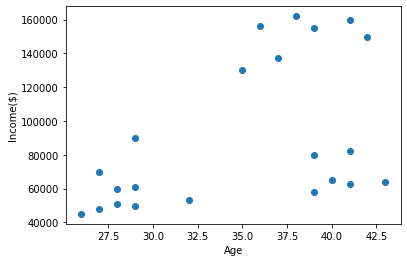

In [3]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
from sklearn.cluster import KMeans

In [5]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
#predicting the cluster and putting number label
y_predicted= km.fit_predict(data[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
# adding cluster to dataset
data['Cluster']= y_predicted
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
#clusters centers
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

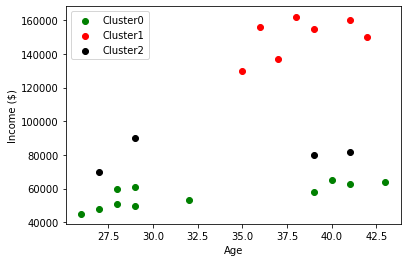

In [9]:
#clusters label
data0 = data[data.Cluster==0]
data1 = data[data.Cluster==1]
data2 = data[data.Cluster==2]

plt.scatter(data0.Age,data0['Income($)'], color='green', label='Cluster0')
plt.scatter(data1.Age,data1['Income($)'], color='red', label='Cluster1')
plt.scatter(data2.Age,data2['Income($)'], color='black', label='Cluster2')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler= MinMaxScaler()

In [12]:
scaler.fit(data[['Income($)']])
#Scaling income 0 to 1 becasue it is very huge range
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

#Scaling age 0 to 1 to match with income
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(data[['Age', 'Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [14]:
data2.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


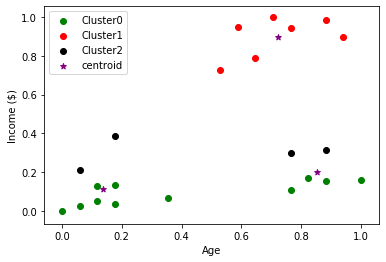

In [15]:
data0 = data[data.Cluster==0]
data1 = data[data.Cluster==1]
data2 = data[data.Cluster==2]

plt.scatter(data0.Age,data0['Income($)'], color='green', label='Cluster0')
plt.scatter(data1.Age,data1['Income($)'], color='red', label='Cluster1')
plt.scatter(data2.Age,data2['Income($)'], color='black', label='Cluster2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

### Elbow plot

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Abdullah\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [20]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.17473586079225922,
 0.13706529523670866,
 0.10383752586603562]

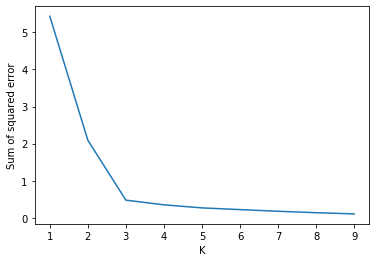

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)